# Detect duplicated images from a dataset

In this lab we are going to learn how we can scan our disc and detect duplicated images.



Checkout the original source https://www.pyimagesearch.com/2020/04/20/detect-and-remove-duplicate-images-from-a-dataset-for-deep-learning/

In [4]:
from imutils import paths
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from pyimagesearch.imageutils import display

In [5]:

def dhash(image, hashSize=8):
	# convert the image to grayscale and resize the grayscale image,
	# adding a single column (width) so we can compute the horizontal gradient
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	resized = cv2.resize(gray, (hashSize + 1, hashSize))

	# compute the (relative) horizontal gradient between adjacent column pixels
	diff = resized[:, 1:] > resized[:, :-1]

	# convert the difference image to a hash and return it
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

def get_hashes(imagePaths):
	hashes = {}
    # loop over our image paths
	for imagePath in imagePaths:
        # load the input image and compute the hash
		image = cv2.imread(imagePath)
		h = dhash(image)

        # grab all image paths with that hash, add the current image
        # path to it, and store the list back in the hashes dictionary
		p = hashes.get(h, [])
		p.append(imagePath)
		hashes[h] = p
	return hashes
    

[INFO] computing image hashes...
[INFO] hash: 7054210665732718398
[INFO] hash: 15443501585133582635
[INFO] hash: 13344784005636363614


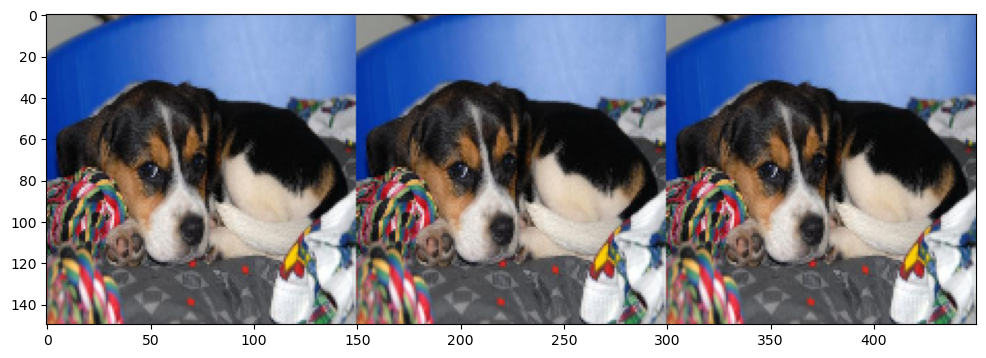

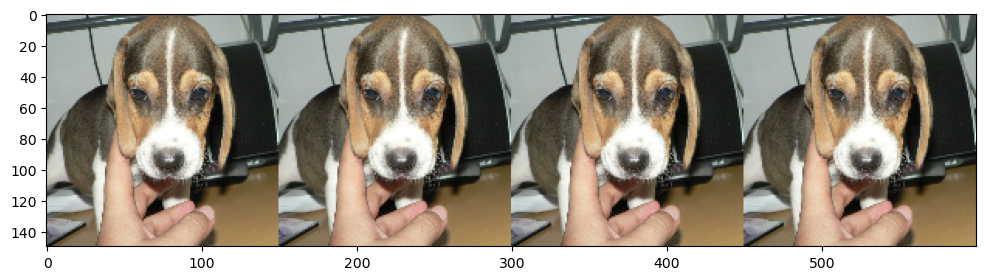

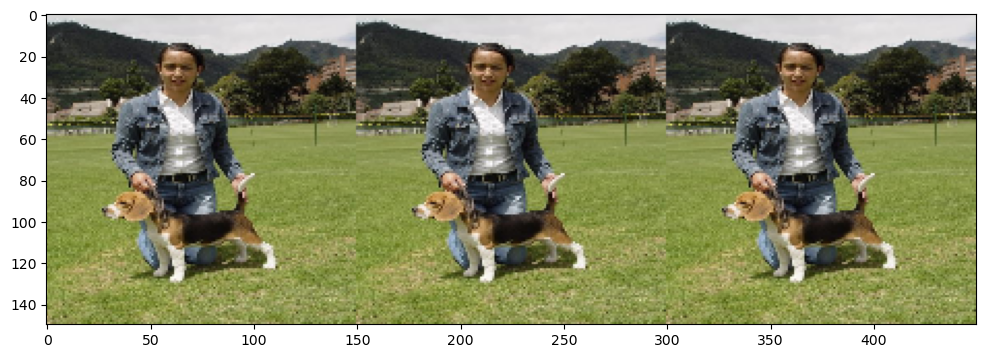

In [6]:

# grab the paths to all images in our input dataset directory and
# then initialize our hashes dictionary
print("[INFO] computing image hashes...")
imagePaths = list(paths.list_images("images/dataset"))
remove = 0
hashes = get_hashes(imagePaths)

# loop over the image hashes
for (h, hashedPaths) in hashes.items():
	# check to see if there is more than one image with the same hash
	if len(hashedPaths) > 1:
		# check to see if this is a dry run
		if remove <= 0:
			# initialize a montage to store all images with the same hash
			montage = None

			# loop over all image paths with the same hash
			for p in hashedPaths:
				# load the input image and resize it to a fixed width
				# and height
				image = cv2.imread(p)
				image = cv2.resize(image, (150, 150))

				# if our montage is None, initialize it
				if montage is None:
					montage = image

				# otherwise, horizontally stack the images
				else:
					montage = np.hstack([montage, image])

			# show the montage for the hash
			print("[INFO] hash: {}".format(h))
			display(montage)


		# otherwise, we'll be removing the duplicate images
		else:
			# loop over all image paths with the same hash *except*
			# for the first image in the list (since we want to keep
			# one, and only one, of the duplicate images)
			for p in hashedPaths[1:]:
				"[INFO] deleting  {}".format(p)
				os.remove(p)